In [1]:
#Importing the dataset and required libraries and packages 

import pandas as pd 
import numpy as np
import pandas_profiling as pf
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC
import sklearn.metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Analytics For Financial Markets(823)/Team Assignment 2/Bankruptcy_data_Final.csv')

In [2]:
#Understanding the Datatypes of the features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [3]:
#Statistical Summary of the Dataset

df.describe()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92872.000000,92620.000000,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,2004.105888,25.369008,-14.461355,-2.631237,-29.537274,-1.222871,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294077,1.900109,0.343320,0.006008
std,9.875926,902.818813,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,1979.000000,0.009000,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431000,-1.000000,0.000000
25%,1998.000000,1.120000,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.053000,-0.034000,-0.048000,0.000000
50%,2006.000000,1.540000,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.052000,0.060000,0.017000,0.000000
75%,2012.000000,2.590000,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192000,0.204000,0.131000,0.000000
max,2017.000000,194537.670000,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


In [4]:
#Counting the missing or null values in the dataset

pd.isna(df).sum()

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [5]:
#Replacing the null or missing values with zero 

df=df.fillna(0)

In [6]:
#Checking the count of Missing or Null Values after replacement

pd.isna(df).sum()

Data Year - Fiscal    0
Tobin's Q             0
EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [7]:
#Feature Engineering the 'New_Year' variable 

df['New_Year']=2020-df['Data Year - Fiscal']

In [8]:
#Removing the 'Data Year - Fiscal' feature

df1=df.drop(['Data Year - Fiscal'],axis=1)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tobin's Q           92872 non-null  float64
 1   EPS                 92872 non-null  float64
 2   Liquidity           92872 non-null  float64
 3   Profitability       92872 non-null  float64
 4   Productivity        92872 non-null  float64
 5   Leverage Ratio      92872 non-null  float64
 6   Asset Turnover      92872 non-null  float64
 7   Operational Margin  92872 non-null  float64
 8   Return on Equity    92872 non-null  float64
 9   Market Book Ratio   92872 non-null  float64
 10  Assets Growth       92872 non-null  float64
 11  Sales Growth        92872 non-null  float64
 12  Employee Growth     92872 non-null  float64
 13  BK                  92872 non-null  int64  
 14  New_Year            92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [9]:
#Counting the label values

df1['BK'].value_counts()

0    92314
1      558
Name: BK, dtype: int64

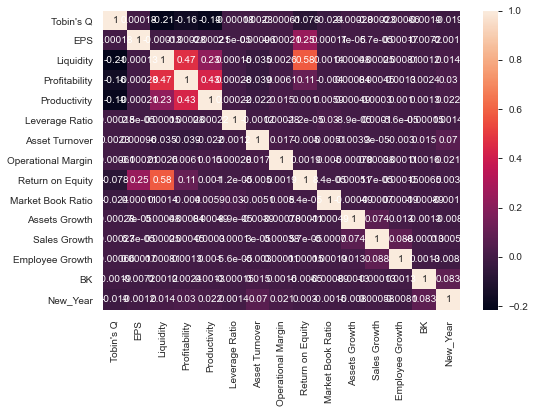

In [10]:
#Plotting the correlation matrix using pearson co-efficient method

corrmat=df1.corr(method='pearson')

sn.heatmap(corrmat,annot=True)

plt.show()

In [11]:
#Segregating the features and target variable into two dataframes for splitting the dataset into train and test

df1_features=df1.iloc[:,0:13]

series=df1['New_Year']

df1_features=pd.concat([df1_features,series],axis=1)

df1_target=df1.iloc[:,13]

In [12]:

# Split the data into training and testing sets

train_features, test_features, train_target, test_target = train_test_split(df1_features, df1_target, test_size = 0.25,random_state=42,stratify=df1['BK'].values)


In [13]:
#Downsampling data balancing method


rus = RandomUnderSampler(random_state=42,replacement=False)
train_features_new, train_target_new = rus.fit_resample(train_features, train_target)

In [14]:
pd.Series(train_target_new).value_counts()

1    419
0    419
Name: BK, dtype: int64

In [15]:
#Setting up the Random Forest Classifier Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [16]:
# Use the GridSearch to search for best hyperparameters

rf_model = RFC(random_state=42)

rf = GridSearchCV(rf_model,random_grid, cv=3,verbose=10,scoring='roc_auc',n_jobs=-1)

# Fit the random search model
rf.fit(train_features_new, train_target_new)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 12, 15, 17, 20, None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50]},
             scoring='roc_auc', verbose=10)

In [17]:
#The best tuned RF model

rf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [18]:
#Fitting the best tuned RF Model on Testing dataset

rf_pred=rf.predict(test_features)

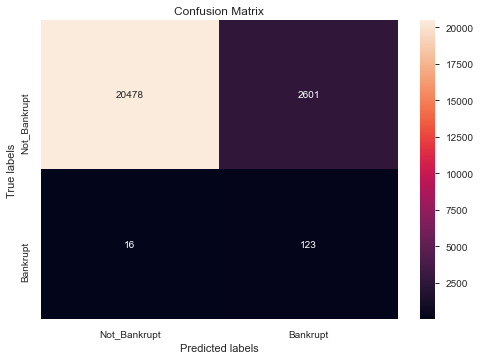

In [19]:
#Creating the Confusion Matrix for RF Model

cm_rf=mt.confusion_matrix(test_target,rf_pred,labels=[0,1])

#Bakrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_rf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);

In [20]:
# Measuring the AUC score
mt.roc_auc_score(test_target,rf_pred)

0.8860961146590333

In [21]:
#Measuring the F1 Score

mt.f1_score(test_target,rf_pred)

0.08592385609500523

In [22]:
#Measuring the Precision Score

mt.precision_score(test_target,rf_pred)

0.04515418502202643

In [23]:
#Measuring the Recall Score

mt.recall_score(test_target,rf_pred)

0.8848920863309353

In [24]:
# Defining SVM hyperparameter tuning

#Hypereparameter Grid
svm_grid = {'C': [0.1, 1, 10, 20, 90,100,120], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

#Defininf the SVM Model 
svm_model=SVC(random_state=42)  

#Defining the SVM grid search CV model 
svm = GridSearchCV(svm_model, svm_grid, refit = True, verbose = 10,n_jobs=-1,scoring='roc_auc')
  
# fitting the model for grid search
svm.fit(train_features_new, train_target_new)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1994s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    7.0s finished


GridSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 90, 100, 120],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='roc_auc', verbose=10)

In [25]:
#Best SVM Model

svm.best_params_ 

{'C': 120, 'gamma': 0.0001, 'kernel': 'rbf'}

In [26]:
#Fitting the best tuned SVM model on the testing dataset

svm_predictions=svm.predict(test_features)

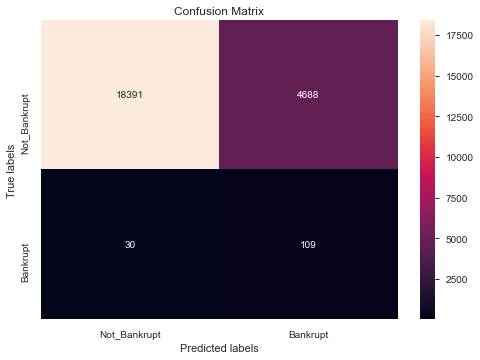

In [27]:
#Generating the Confusion Matrix

cm_svm=mt.confusion_matrix(test_target,svm_predictions,labels=[0,1])

#Bankrupt:1, Not_Bankrupt:0
ax= plt.subplot() 
sn.heatmap(cm_svm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells 
# labels, title and ticks 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']); 
ax.yaxis.set_ticklabels(['Not_Bankrupt', 'Bankrupt']);



In [28]:
#Measuring the ROC Score

mt.roc_auc_score(test_target,svm_predictions)

0.7905221383792486

In [29]:
#Measuring the F1 Score

mt.f1_score(test_target,svm_predictions)

0.04416531604538088

In [30]:
#Measuring the Precision Score

mt.precision_score(test_target,svm_predictions)

0.02272253491765687

In [31]:
#Measuring the Recall Score

mt.recall_score(test_target,svm_predictions)

0.7841726618705036

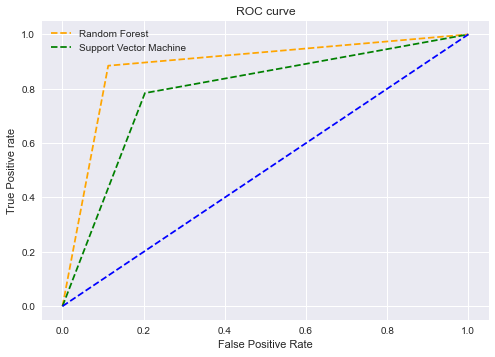

In [32]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_target, rf_pred[:],pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_target, svm_predictions[:],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_target))]
p_fpr, p_tpr, _ = roc_curve(test_target, random_probs, pos_label=1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Support Vector Machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()